# Exploratory Data Analysis

In [45]:
# Importing libraries and setup
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Importing the data
df = pd.read_csv('housing_prices.csv')

## Understanding the data

In [4]:
df.shape

(1460, 81)

In [5]:
cat_count = len(df.select_dtypes(['object', 'bool']).columns)
num_count = len(df.columns) - cat_count
print('Numerical variables', num_count)
print('Categorical variables', cat_count)

Numerical variables 38
Categorical variables 43


In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
# We don't need the ID and sale condition columns for analysis or as an input to our model
# We also remove SalePrice column as it is the target variable
dropped_df = df.drop(columns=['Id', 'SaleCondition', 'SalePrice'])
dropped_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,2,2008,WD
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,NaN,NaN,0,5,2007,WD
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,9,2008,WD
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,NaN,NaN,0,2,2006,WD
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,NaN,NaN,0,12,2008,WD


### Overall Statistical Summary

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Analysing numerical data

In [10]:
#Function for calculating iqr
def calc_iqr(dframe, col):
    return dframe[col].quantile(q=0.75) - dframe[col].quantile(q=0.25)

#Function for outlier count
def outlier_count(dframe, col):
    upper_count = dframe[dframe[col] > dframe[col].quantile(q=0.75) + 1.5*calc_iqr(dframe, col)].shape[0]
    lower_count = dframe[dframe[col] < dframe[col].quantile(q=0.25) - 1.5*calc_iqr(dframe, col)].shape[0]
    return upper_count + lower_count

In [11]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)    

columns = ['Negative value count', 'Unique value count', 'Zero value count', 'Missing value percentage', 
           'Outlier count']
df_num = dropped_df._get_numeric_data()
df_num_info = pd.DataFrame(columns=columns, index=df_num.columns)

for col in df_num.columns:
    df_num_info.loc[col, 'Negative value count'] = df_num[df_num[col] < 0].shape[0]
    df_num_info.loc[col, 'Unique value count'] = len(df_num[col].unique())
    df_num_info.loc[col, 'Zero value count'] = df_num[df_num[col] == 0].shape[0]
    df_num_info.loc[col, 'Missing value percentage'] = df_num[df_num[col].isnull()].shape[0] / df_num.shape[0]
    df_num_info.loc[col, 'Outlier count'] = outlier_count(df_num, col)
df_num_info

,Negative value count,Unique value count,Zero value count,Missing value percentage,Outlier count
MSSubClass,0,15,0,0,103
LotFrontage,0,111,0,0.177397,88
LotArea,0,1073,0,0,69
OverallQual,0,10,0,0,2
OverallCond,0,9,0,0,125
YearBuilt,0,112,0,0,7
YearRemodAdd,0,61,0,0,0
MasVnrArea,0,328,861,0.00547945,96
BsmtFinSF1,0,637,467,0,7
BsmtFinSF2,0,144,1293,0,167


### Analysing Categorical Data

In [12]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

columns = ['Unique categories', 'Missing value percentage']
df_cat = dropped_df.select_dtypes(['object', 'bool'])
df_cat_info = pd.DataFrame()

for col in df_cat.columns:
    df_cat_info.loc[col, 'Unique categories'] = len(df_cat[col].unique())
    df_cat_info.loc[col, 'Missing value percentage'] = df_cat[df_cat[col].isnull()].shape[0] / df_cat.shape[0]
df_cat_info

,Unique categories,Missing value percentage
MSZoning,5.0,0.000000
Street,2.0,0.000000
Alley,3.0,0.937671
LotShape,4.0,0.000000
LandContour,4.0,0.000000
Utilities,2.0,0.000000
LotConfig,5.0,0.000000
LandSlope,3.0,0.000000
Neighborhood,25.0,0.000000
Condition1,9.0,0.000000


### Analysing the target variable

In [13]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

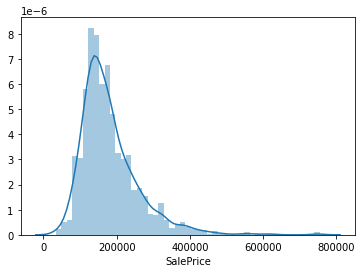

In [14]:
sns.distplot(df['SalePrice'])

In [15]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Curtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Curtosis: 6.536282


## Univariate Analysis

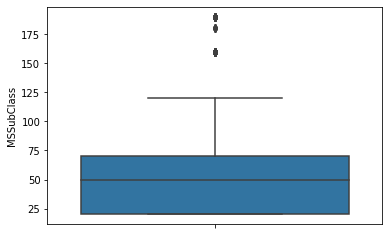

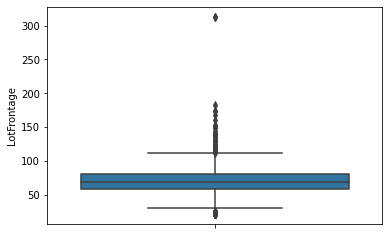

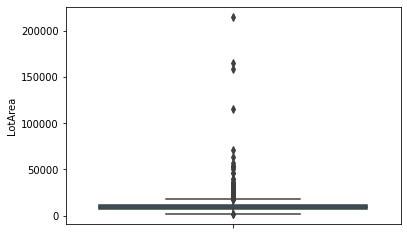

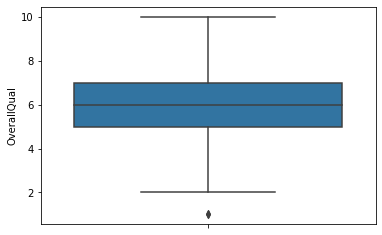

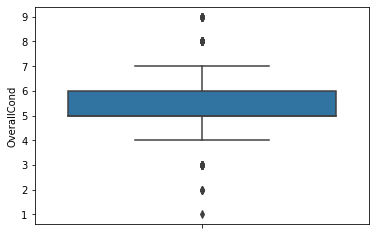

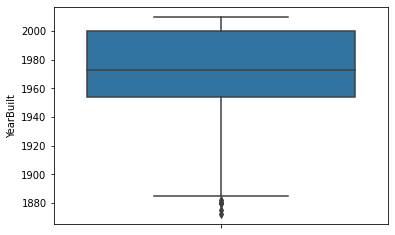

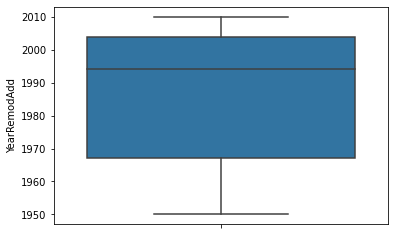

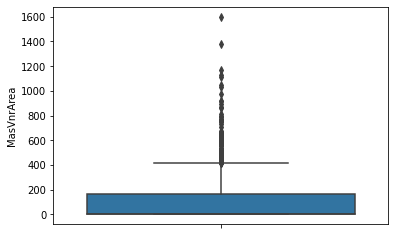

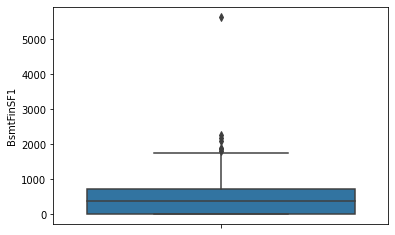

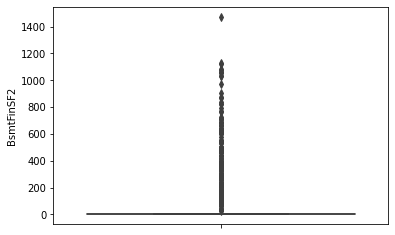

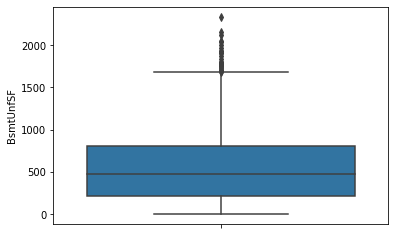

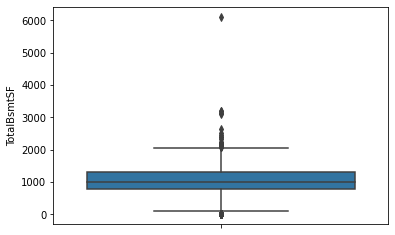

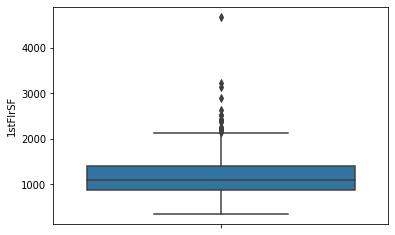

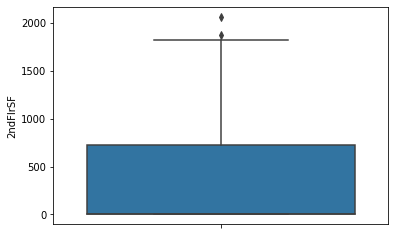

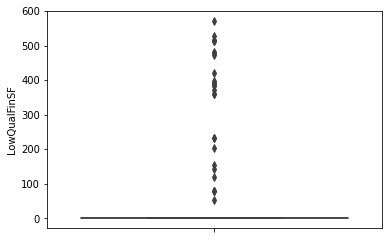

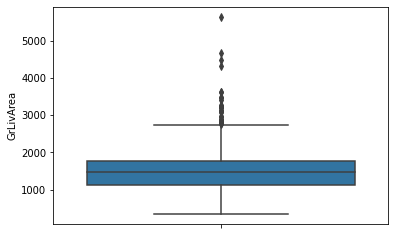

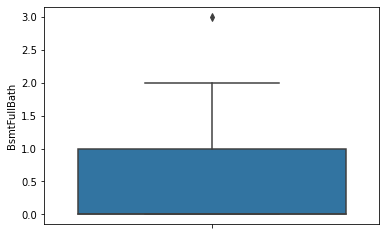

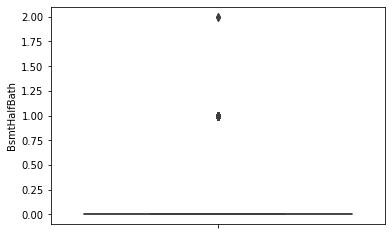

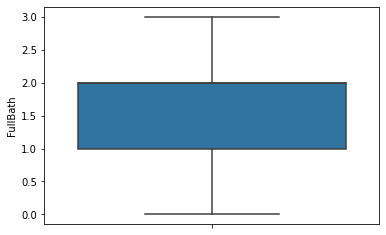

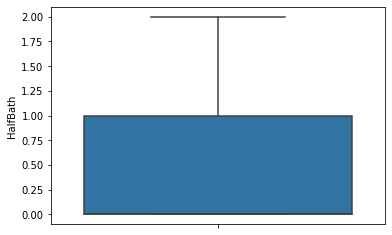

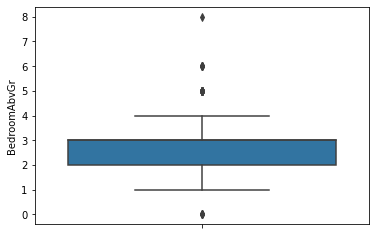

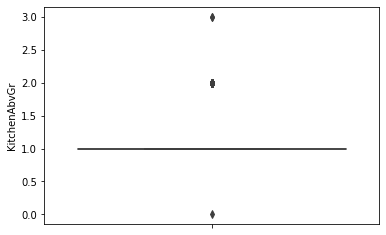

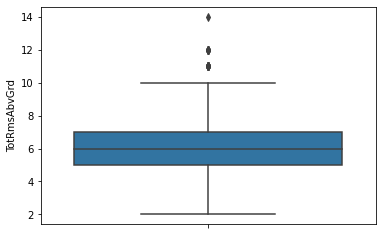

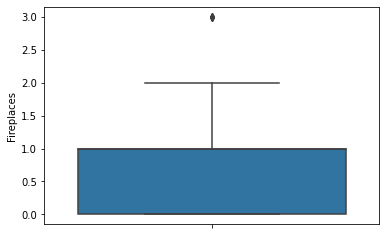

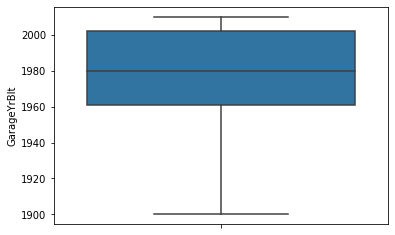

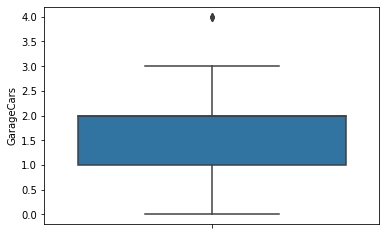

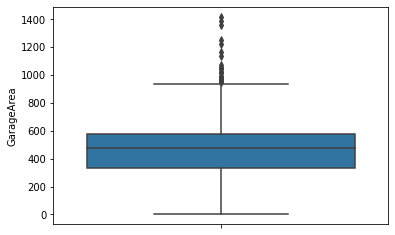

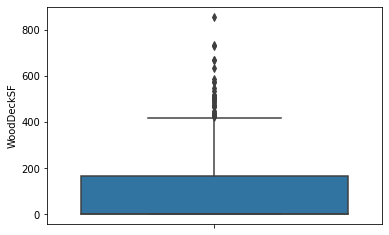

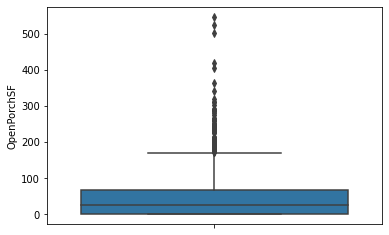

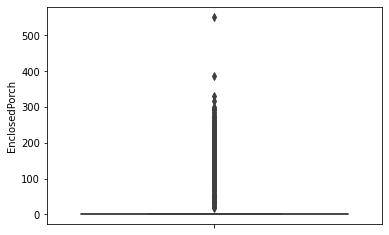

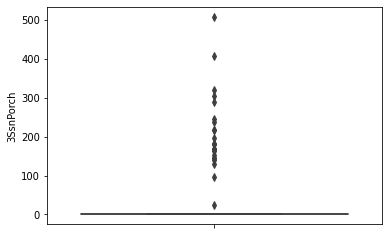

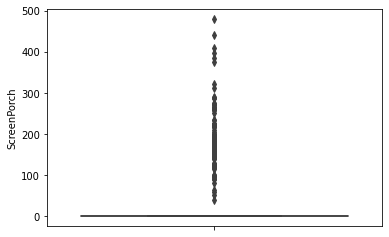

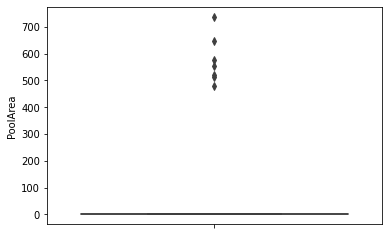

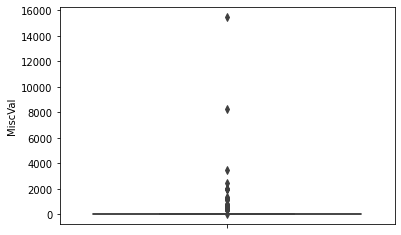

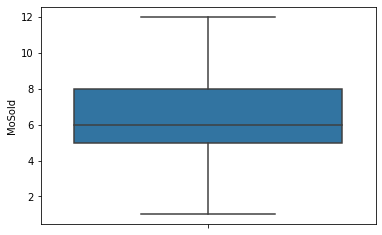

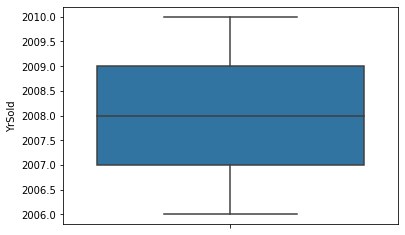

In [16]:
# Plotting box plots of all numeric data to visualise the outliers
df_num = dropped_df._get_numeric_data()
for col in df_num.columns:
    sns.boxplot(x=df_num[df_num[col].notnull()][col], orient='v')
    plt.xlabel = col
    plt.ylabel = 'Values'
    plt.show()

## Bivariate Analysis

In [17]:
# Analysing the target variable relationship with other variables

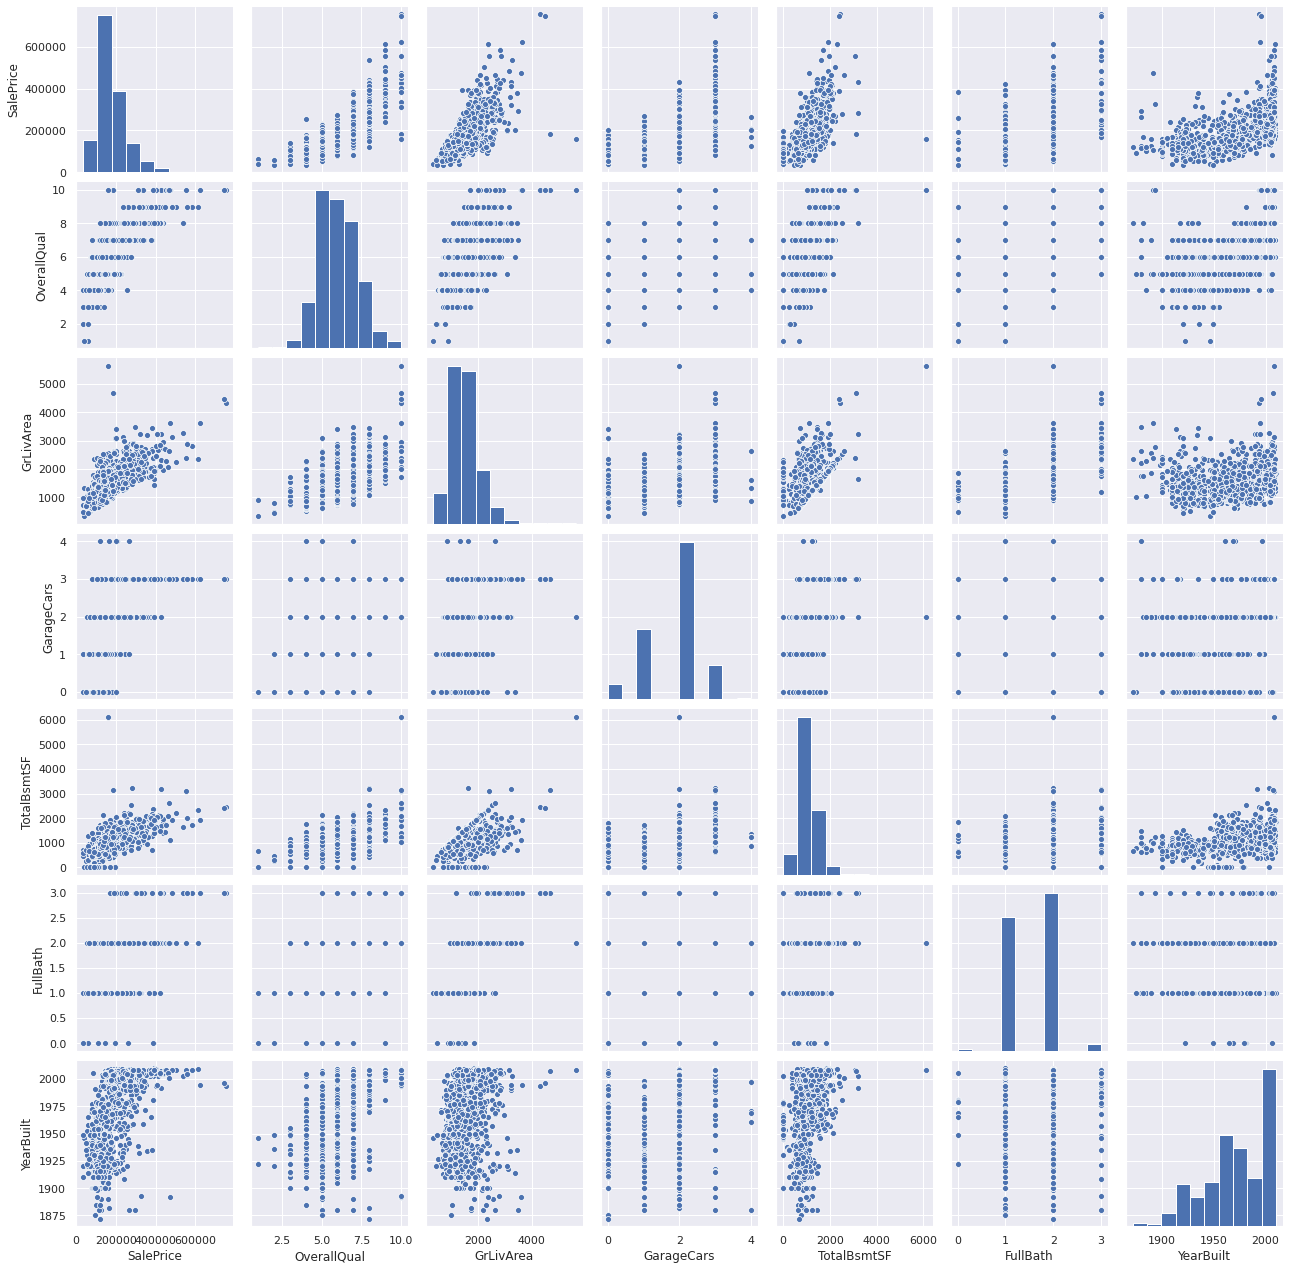

In [18]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

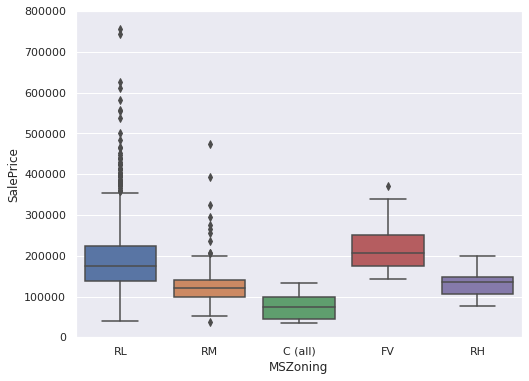

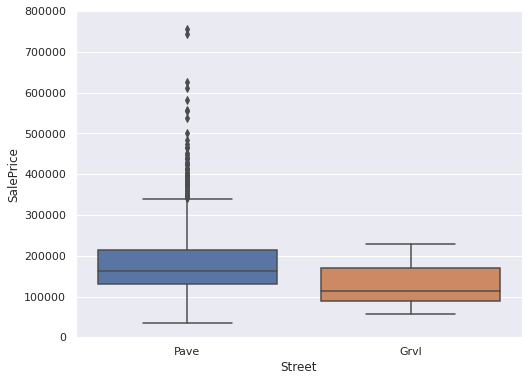

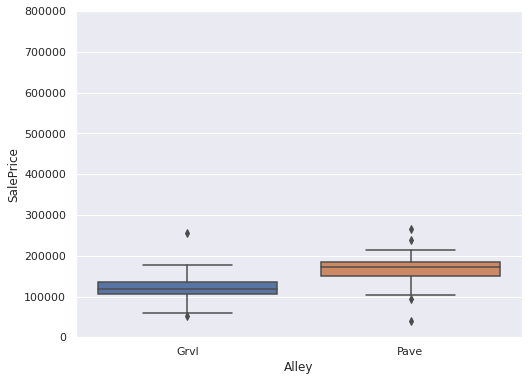

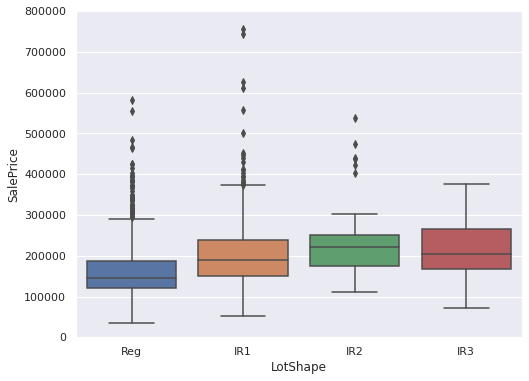

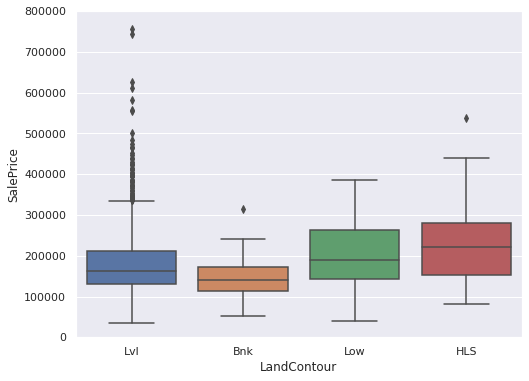

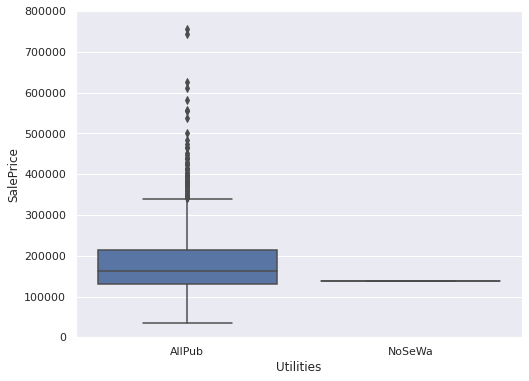

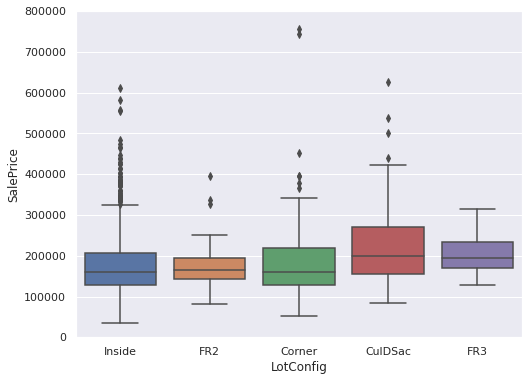

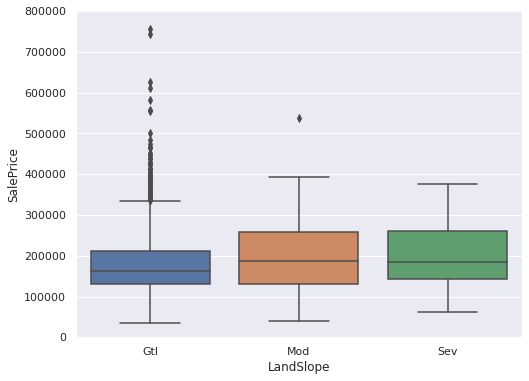

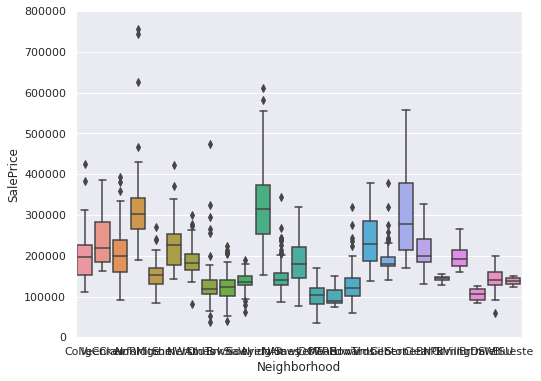

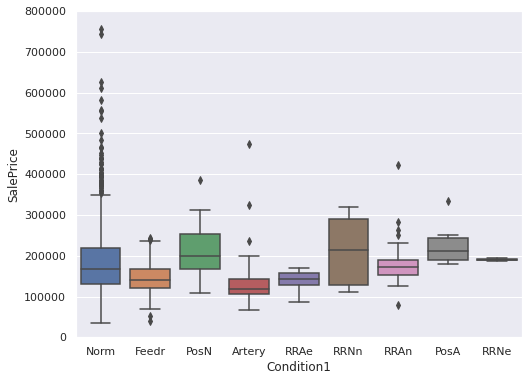

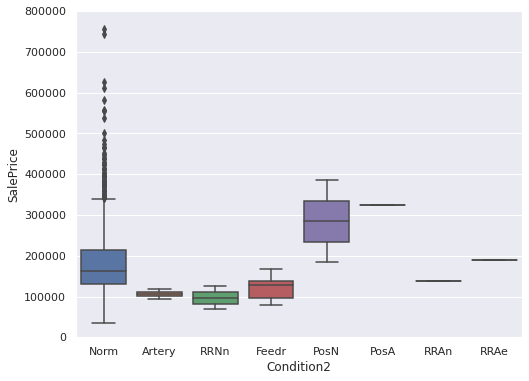

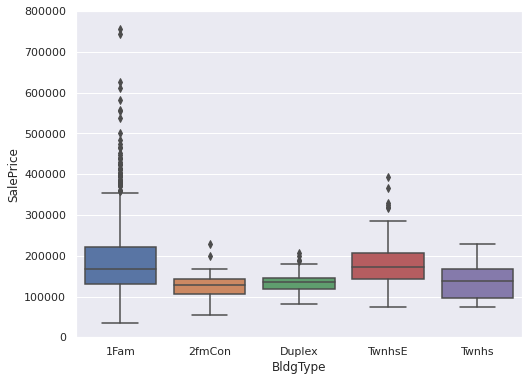

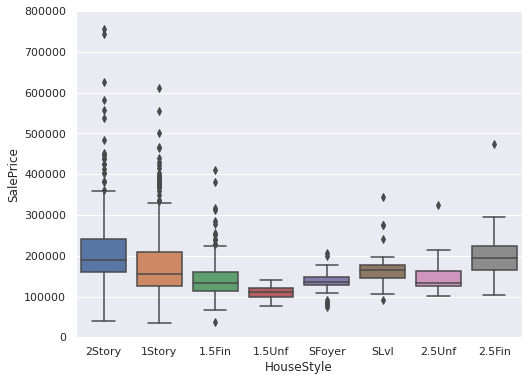

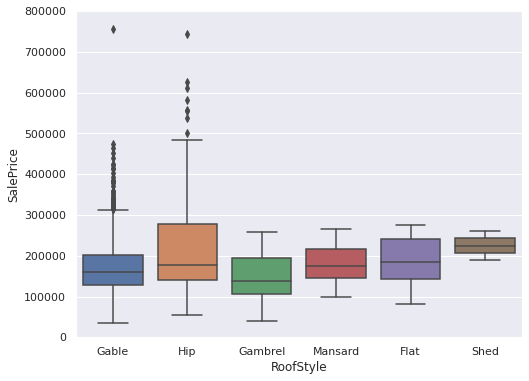

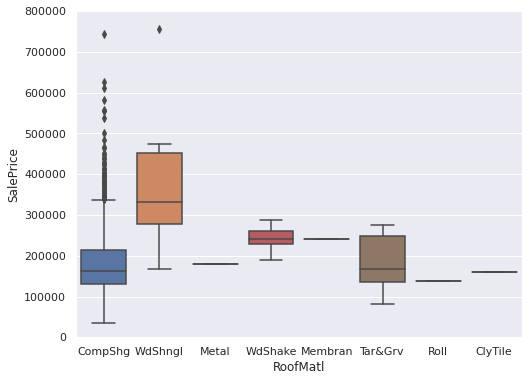

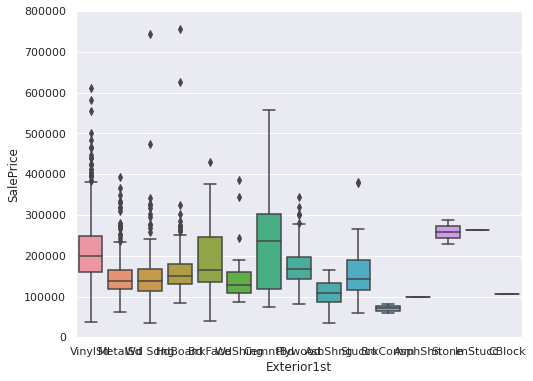

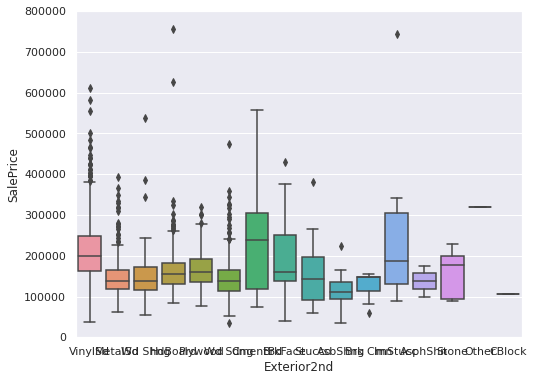

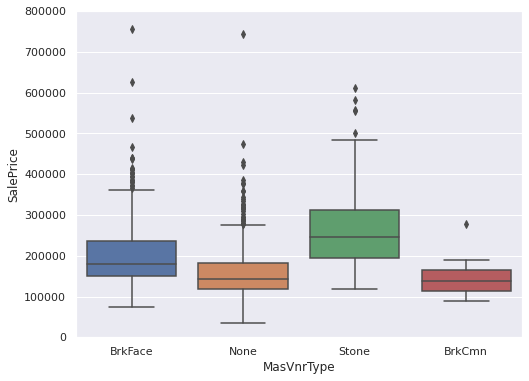

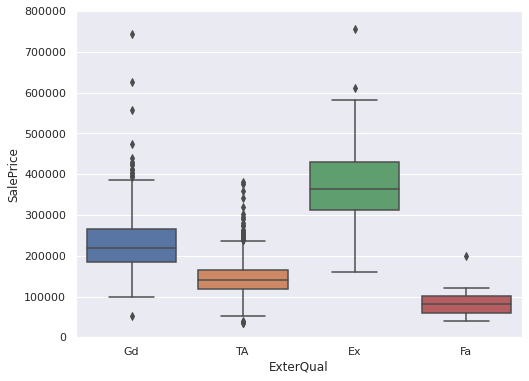

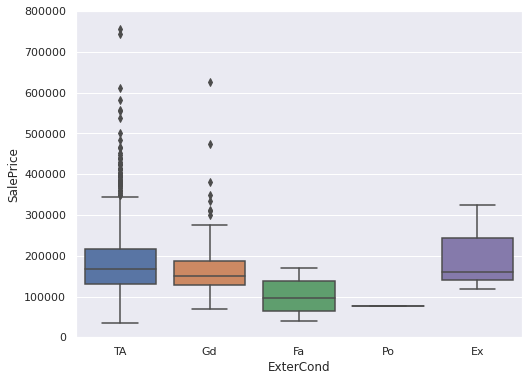

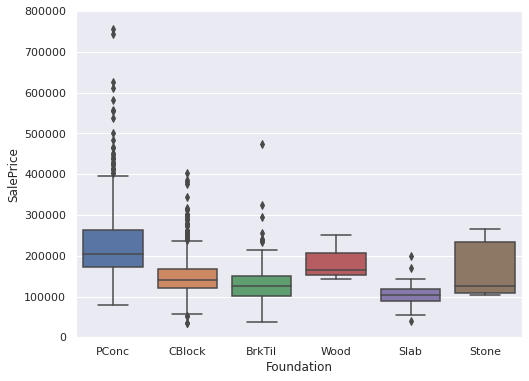

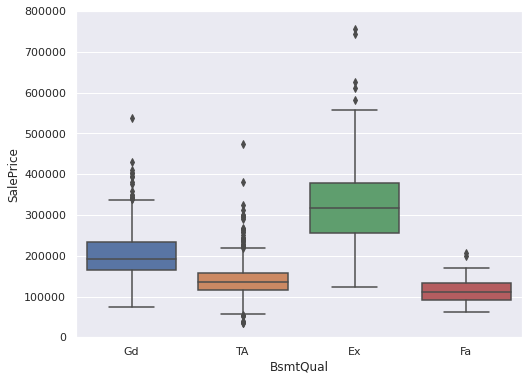

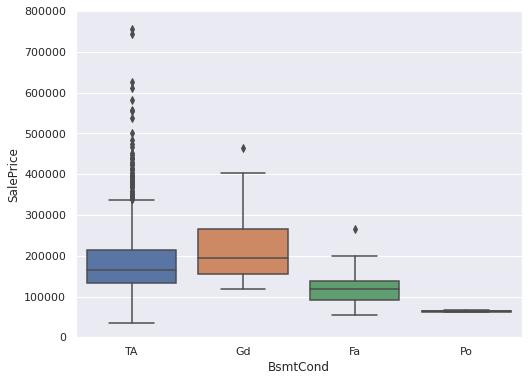

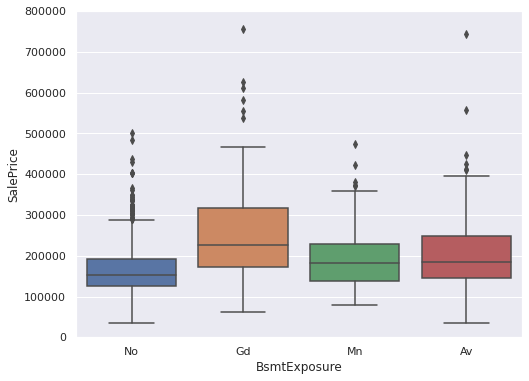

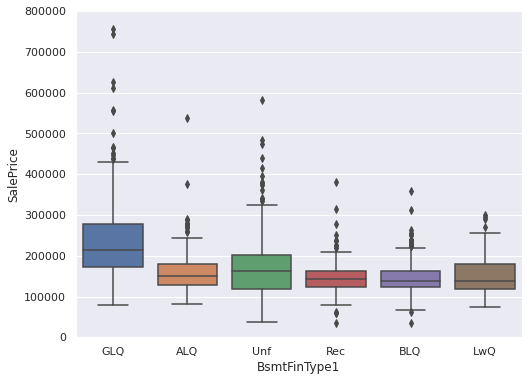

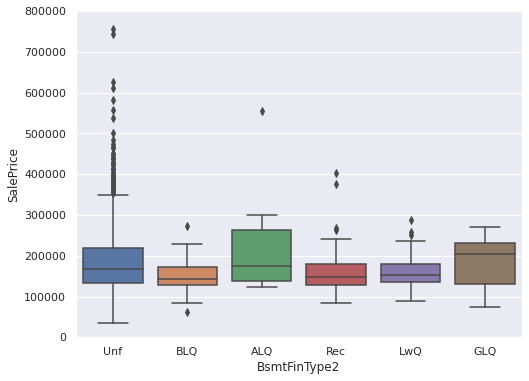

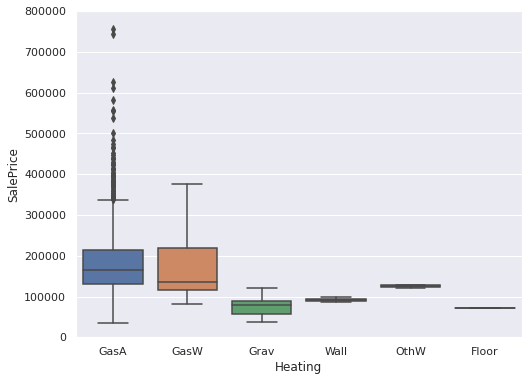

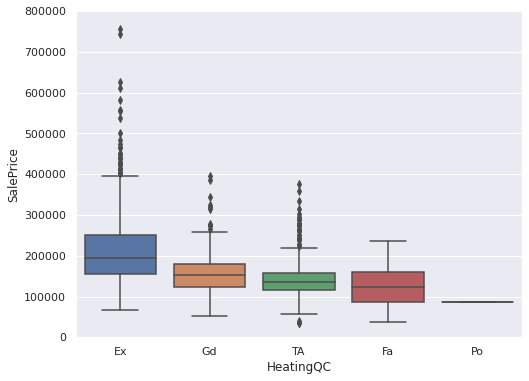

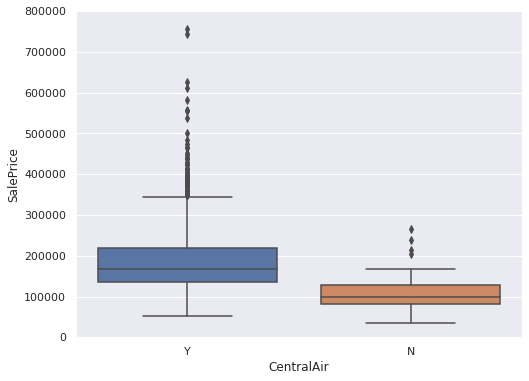

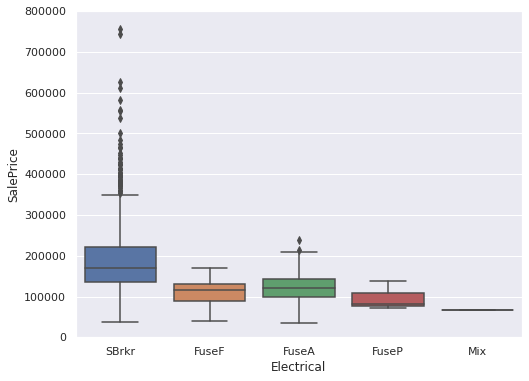

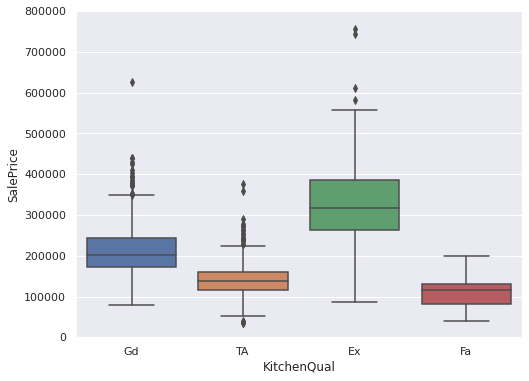

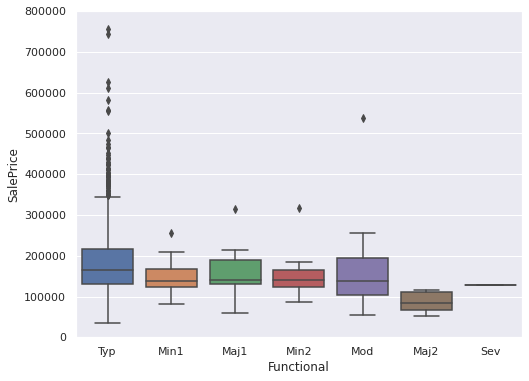

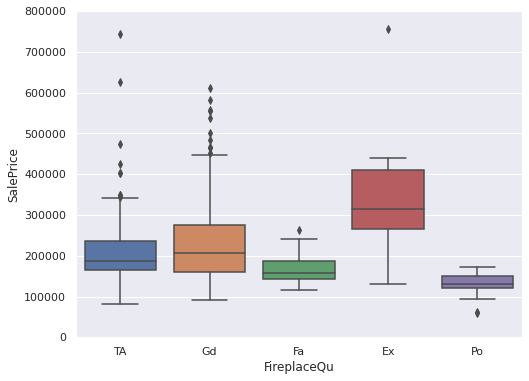

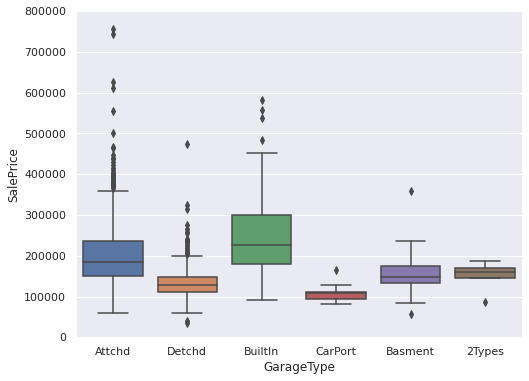

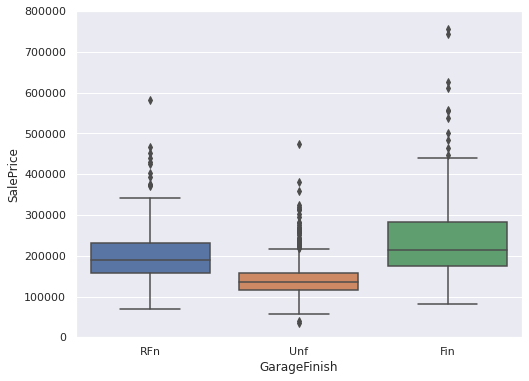

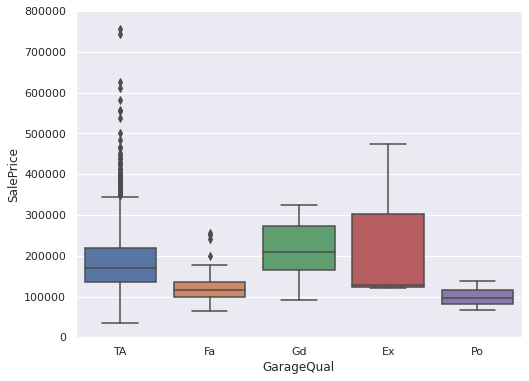

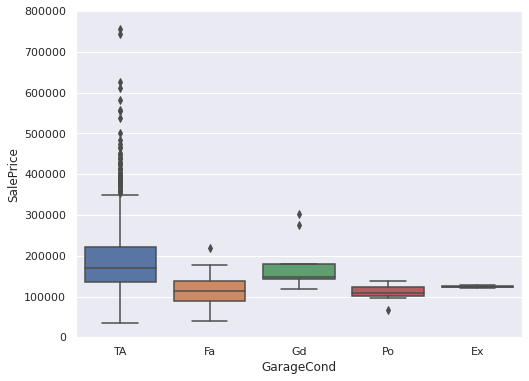

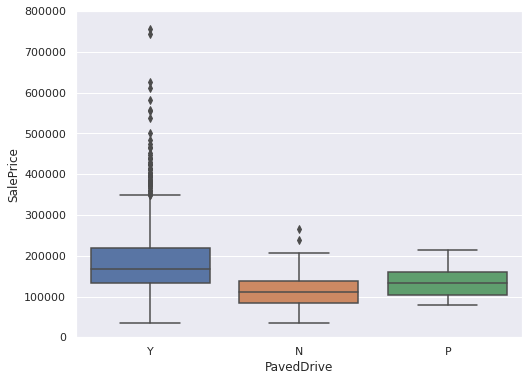

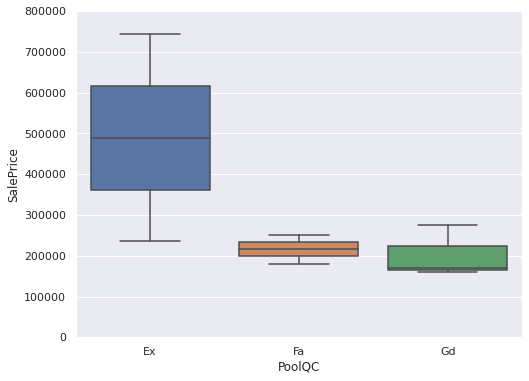

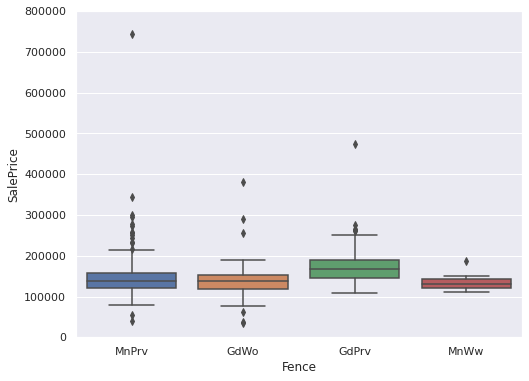

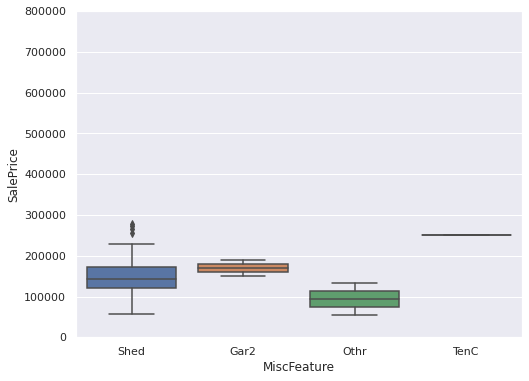

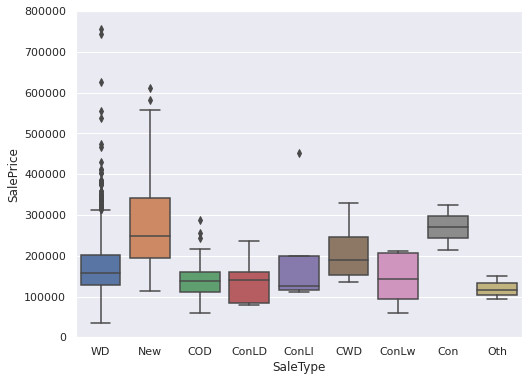

In [19]:
for col in dropped_df.select_dtypes(['object', 'bool']).columns:
    f, ax = plt.subplots(figsize=(8, 6))
    data = pd.concat([df['SalePrice'], df[col]], axis=1)
    ax = sns.boxplot(x=col, y="SalePrice", data=data)
    ax.axis(ymin=0, ymax=800000);

### Heat Map

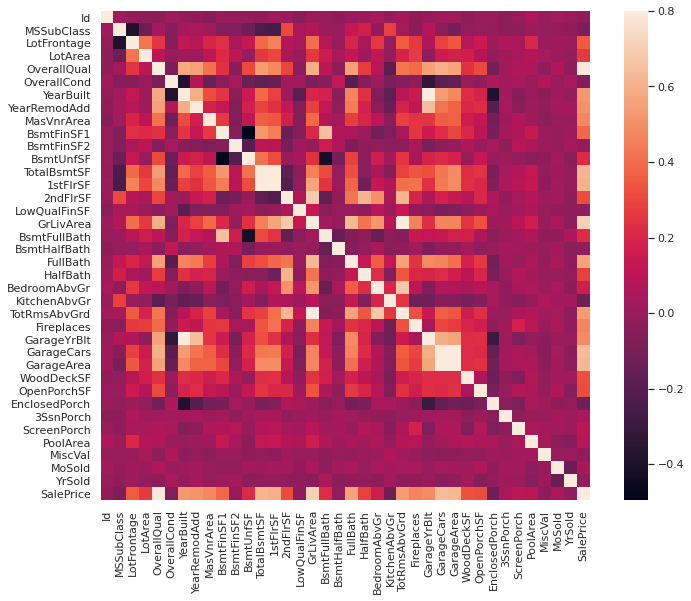

In [20]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

#### Zoomed in view of heatmap

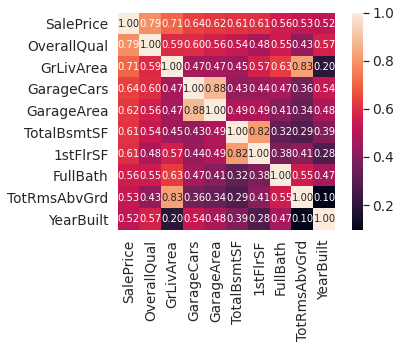

In [21]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Conclusions

* OverallQual, GrLivArea, GarageCars, GarageArea and TotalBsmtSF are the variables that are seen to be influencing the target variable SalePrice the most
* Since OverallQual has very few unique values it can be ignored from the dependency analysis. It may be converted to a categorical variable
* Analysing other pairs in a similar way the one of the interdependent variables can be removed

## Data Sanitation

### Missing values

In [22]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [26]:
dropped_df = dropped_df.drop((missing_data[missing_data['Total'] > 1]).index,1)
dropped_df = dropped_df.drop(dropped_df.loc[dropped_df['Electrical'].isnull()].index)

In [27]:
dropped_df.isnull().sum().max()

0

### Outliers

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


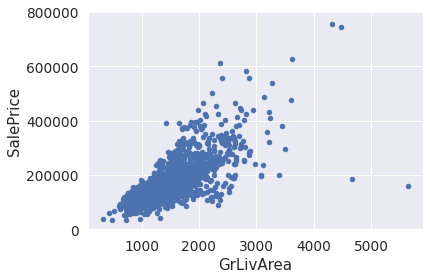

In [31]:
# Analysing SalePrice against GrLivArea

data = pd.concat([df['SalePrice'], dropped_df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000))

In [36]:
dropped_df = dropped_df.drop(dropped_df[dropped_df['GrLivArea'] > 4500].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


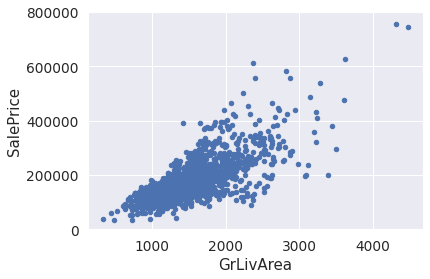

In [37]:
data = pd.concat([df['SalePrice'], dropped_df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


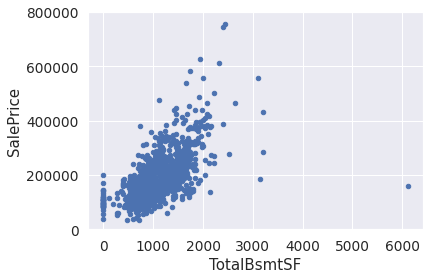

In [39]:
# Analysing SalePrice against TotalBsmtSF

data = pd.concat([df['SalePrice'], dropped_df['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


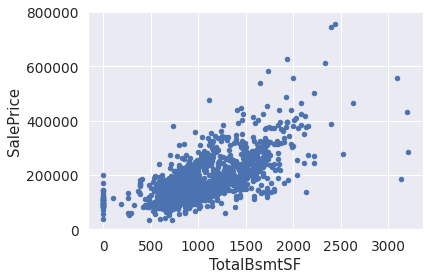

In [40]:
dropped_df = dropped_df.drop(dropped_df[dropped_df['TotalBsmtSF'] > 4000].index)

data = pd.concat([df['SalePrice'], dropped_df['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))

### Numerical to Categorical

Certain variables such as OverallQual have very less unique count (<10). In such cases the varable is not fit to be a numerical variable and hence can be converted into categorical variable

In [44]:
# dropped_df = dropped_df['OverallQual'].astype('category')

### Normality

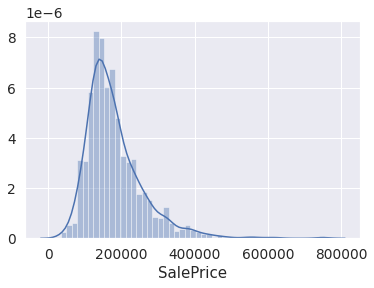

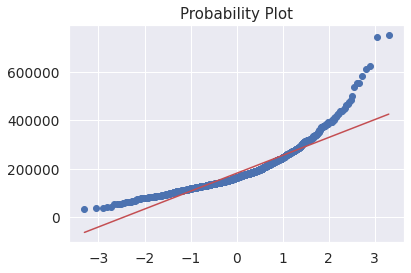

In [49]:
# Checking the distribution of the target variable
sns.distplot(df['SalePrice'])
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

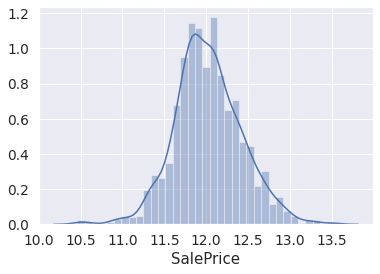

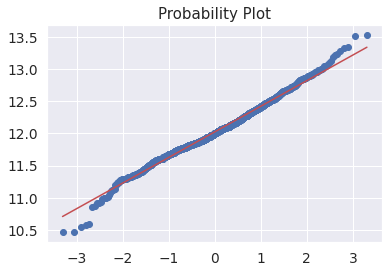

In [51]:
# We apply log transform to get a normal distribution

df['SalePrice'] = np.log(df['SalePrice'])

sns.distplot(df['SalePrice'])
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)